In [40]:
################################################
#####    MULTIVARIATE DATA AND ANALYSIS    #####
################################################
#install.packages("MVA")

# We use data in MVA package:
library("MVA")

# 'Just in case':
set.seed(280875)

# Multivariate data arise when researchers record 
# the values of several random variables on a 
# number of subjects or objects or perhaps one 
# of a variety of other things (we will use the 
# general term\units") in which they are interested,
# leading to a vector-valued or multidimensional 
# observation for each.

# Most multivariate data sets can be represented 
# in the same way, namely in a rectangular format
# known from spreadsheets, in which the elements 
# of each row correspond to the variable values 
# of a particular unit in the data set and the
# elements of the columns correspond to the 
# values taken by a particular variable.

### SEE SLIDE

# Although in some cases where multivariate data 
# have been collected it may make sense to isolate
# each variable and study it separately, in the 
# main it does not. Because the whole set of 
# variables is measured on each unit, the variables
# will be related to a greater or lesser degree. 
# Consequently, if each variable is analysed in 
# isolation, the full structure of the data may 
# not be revealed.

# Multivariate statistical analysis is the 
# simultaneous statistical analysis of a
# collection of variables, which improves upon 
# separate univariate analyses of each variable
# by using information about the relationships 
# between the variables.

# Analysis of each variable separately is very 
# likely to miss uncovering key features of, and
# patterns in, the multivariate data.

### Exploratory versus Inferential

# The units in a set of multivariate data are 
# sometimes sampled from a population of
# interest, but often not. Consequently, there 
# are methods of multivariate analysis that 
# are essentially exploratory and others that
# can be used for statistical inference.

# Exploratory: PCA, MDS, EFA and CA
# Inferential: CFA and SEM

#################################################
##### Types of Variables and Missing Values #####
#################################################

# Create hypothetical MV data on 10 people
# Number of variables q = 7
hypo <-
  structure(list(individual = 1:10, sex = structure(c(2L, 2L, 2L,
    2L, 2L, 1L, 1L, 1L, 1L, 1L), .Label = c("Female", "Male"), class = "factor"),
    age = c(21L, 43L, 22L, 86L, 60L, 16L, NA, 43L, 22L, 80L),
    IQ = c(120L, NA, 135L, 150L, 92L, 130L, 150L, NA, 84L, 70L),
    depression = structure(c(2L, 1L, 1L, 1L, 2L, 2L, 2L, 2L,
    1L, 1L), .Label = c("No", "Yes"), class = "factor"), health = structure(c(3L,
    3L, 1L, 4L, 2L, 2L, 3L, 1L, 1L, 2L), .Label = c("Average",
    "Good", "Very good", "Very poor"), class = "factor"), weight = c(150L,
    160L, 135L, 140L, 110L, 110L, 120L, 120L, 105L, 100L)), .Names = c("individual",
    "sex", "age", "IQ", "depression", "health", "weight"), class = "data.frame", row.names = c(NA, -10L))

# take a look
hypo

individual,sex,age,IQ,depression,health,weight
1,Male,21,120,Yes,Very good,150
2,Male,43,NA,No,Very good,160
3,Male,22,135,No,Average,135
4,Male,86,150,No,Very poor,140
5,Male,60,92,Yes,Good,110
6,Female,16,130,Yes,Good,110
7,Female,NA,150,Yes,Very good,120
8,Female,43,NA,Yes,Average,120
9,Female,22,84,No,Average,105
10,Female,80,70,No,Good,100


In [41]:
str(hypo)

'data.frame':	10 obs. of  7 variables:
 $ individual: int  1 2 3 4 5 6 7 8 9 10
 $ sex       : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 1
 $ age       : int  21 43 22 86 60 16 NA 43 22 80
 $ IQ        : int  120 NA 135 150 92 130 150 NA 84 70
 $ depression: Factor w/ 2 levels "No","Yes": 2 1 1 1 2 2 2 2 1 1
 $ health    : Factor w/ 4 levels "Average","Good",..: 3 3 1 4 2 2 3 1 1 2
 $ weight    : int  150 160 135 140 110 110 120 120 105 100


In [42]:

# have missing data, NAs on rows 2, 7 and 8

# Because is a dataframe can extract and
# subset out parts of the data:

hypo[1:2, c("health", "weight")]

health,weight
Very good,150
Very good,160


In [43]:
# Four types of numeric data (measurements):

# Nominal: Unordered categorical variables. 
# Examples include treatment allocation,
# the sex of the respondent, hair color, 
# presence or absence of depression, etc

# Ordinal: Where there is an ordering but 
# no implication of equal distance between
# the different points of the scale. 
# Examples include social class, self-
# perception of health (each coded from 
# I to V, say), and educational level
# (no schooling, primary, secondary, or 
# tertiary education).

# Interval: Where there are equal 
# differences between successive points 
# on the scale but the position of zero 
# is arbitrary. The classic example is 
# the measurement of temperature using 
# the Celsius or Fahrenheit scales.

# Ratio: The highest level of measurement, 
# where one can investigate the relative
# magnitudes of scores as well as the 
# differences between them. The position
# of zero is fixed. The classic example 
# is the absolute measure of temperature
# (in Kelvin, for example), but other 
# common ones include age, weight, and 
# length.

### MISSING VALUES

# Are a problem. Typical in longitudinal studies
# where people drop out

# Can take 'complete case' analysis route -
# throw out incomplete cases, but at a cost.

# Can examine complete and incomplete data
# separately to make sure responses seem 
# consistent.

# Can impute missing values-multiple imputation,
# are numerous approaches

# Can ignore missing values

##############################################
### Create measure Data
##############################################

# Let's create some datasets and ask some
# questions about the data and see what sort
# of MVA technique might answer the question(s)

# Measure data: chest, waist, and hip
# measurements on a sample of men and women
measure <-
  # first create list of raw measures
  structure(list(V1 = 1:20, 
                 V2 = c(34L, 37L, 38L, 36L, 38L, 
                        43L, 40L, 38L, 40L, 41L, 
                        36L, 36L, 34L, 33L, 36L, 
                        37L, 34L, 36L, 38L, 35L), 
                 V3 = c(30L, 32L, 30L, 33L, 29L, 
                        32L, 33L, 30L, 30L, 32L, 
                        24L, 25L, 24L, 22L, 26L, 
                        26L, 25L, 26L, 28L, 23L), 
                 V4 = c(32L, 37L, 36L, 39L, 33L, 
                        38L, 42L, 40L, 37L, 39L, 
                        35L, 37L, 37L, 34L, 38L, 
                        37L, 38L, 37L, 40L, 35L)), 
            .Names = c("V1", "V2", "V3", "V4"), 
            # make it a dataframe
            class = "data.frame", 
            # no row names
            row.names = c(NA, -20L))
# put everything but 1:20 measures in measure
measure <- measure[,-1]
# name the columns appropriately
names(measure) <- c("chest", "waist", "hips")
# generate factor levels for new variable
# which we are naming 'gender'
measure$gender <- gl(2, 10)
# name the levels for gender
levels(measure$gender) <- c("male", "female")

# Take a look at data . . .

# look at first six records:
head(measure)

chest,waist,hips,gender
34,30,32,male
37,32,37,male
38,30,36,male
36,33,39,male
38,29,33,male
43,32,38,male


In [44]:
# how many rows?
nrow(measure)

[1] 20

In [45]:
# how many columns?
ncol(measure)

[1] 4

In [46]:
# what is the structure of the data?
str(measure) # all integer except gender

'data.frame':	20 obs. of  4 variables:
 $ chest : int  34 37 38 36 38 43 40 38 40 41 ...
 $ waist : int  30 32 30 33 29 32 33 30 30 32 ...
 $ hips  : int  32 37 36 39 33 38 42 40 37 39 ...
 $ gender: Factor w/ 2 levels "male","female": 1 1 1 1 1 1 1 1 1 1 ...


In [47]:
# Some (researchy) questions:

# 1) Could body size and body shape be
#    summarized in some way by combining the
#    three measurements into a single number?

# Might use Principal Components Analysis

# 2) Are there subtypes of body shapes for the
#    men and for the women within which individuals
#    are of similar shapes and between which
#    body shapes differ?

# Might address with Cluster Analysis

# (Need more than 20 observations to do this tho)

### Pottery data from HSAUR2 package

# Our second set of multivariate data consists 
# of the results of chemical analysis on
# Romano-British pottery made in three different 
# regions (region 1 contains kiln 1, region 2 
# contains kilns 2 and 3, and region 3 contains 
# kilns 4 and 5). 

# One question that might be posed about these
# data is whether the chemical profiles of each 
# pot suggest different types of pots and if
# any such types are related to kiln or region. 

# We address in section on Cluster Analysis

data("pottery", package = "HSAUR2")
head(pottery)

Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,MnO,BaO,kiln
18.8,9.52,2.00,0.79,0.40,3.20,1.01,0.077,0.015,1
16.9,7.33,1.65,0.84,0.40,3.05,0.99,0.067,0.018,1
18.2,7.64,1.82,0.77,0.40,3.07,0.98,0.087,0.014,1
16.9,7.29,1.56,0.76,0.40,3.05,1.00,0.063,0.019,1
17.8,7.24,1.83,0.92,0.43,3.12,0.93,0.061,0.019,1
18.8,7.45,2.06,0.87,0.25,3.26,0.98,0.072,0.017,1


In [48]:
nrow(pottery)

[1] 45

In [49]:
ncol(pottery)

[1] 10

In [50]:
str(pottery) # all numeric except kiln

'data.frame':	45 obs. of  10 variables:
 $ Al2O3: num  18.8 16.9 18.2 16.9 17.8 18.8 16.5 18 15.8 14.6 ...
 $ Fe2O3: num  9.52 7.33 7.64 7.29 7.24 7.45 7.05 7.42 7.15 6.87 ...
 $ MgO  : num  2 1.65 1.82 1.56 1.83 2.06 1.81 2.06 1.62 1.67 ...
 $ CaO  : num  0.79 0.84 0.77 0.76 0.92 0.87 1.73 1 0.71 0.76 ...
 $ Na2O : num  0.4 0.4 0.4 0.4 0.43 0.25 0.33 0.28 0.38 0.33 ...
 $ K2O  : num  3.2 3.05 3.07 3.05 3.12 3.26 3.2 3.37 3.25 3.06 ...
 $ TiO2 : num  1.01 0.99 0.98 1 0.93 0.98 0.95 0.96 0.93 0.91 ...
 $ MnO  : num  0.077 0.067 0.087 0.063 0.061 0.072 0.066 0.072 0.062 0.055 ...
 $ BaO  : num  0.015 0.018 0.014 0.019 0.019 0.017 0.019 0.017 0.017 0.012 ...
 $ kiln : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [51]:
# Our third set of multivariate data involves 
# the examination scores of a large number
# of college students in six subjects. 

# Here the main question of interest might be 
# whether the exam scores reflect some under
# lying trait in a student that cannot be 
# measured directly, perhaps "general intelli-
# gence"? The question could be investigated by
# using exploratory factor analysis

exam <-
  structure(list(subject = 1:5, 
                 math = c(60L, 80L, 53L, 85L, 45L),
                 english = c(70L, 65L, 60L, 79L, 80L), 
                 history = c(75L, 66L, 50L, 71L, 80L), 
                 geography = c(58L, 75L, 48L, 77L, 84L), 
                 chemistry = c(53L,70L, 45L, 68L, 44L), 
                 physics = c(42L, 76L, 43L, 79L, 46L)), 
            .Names = c("subject", "maths", 
                       "english", "history", 
                       "geography", "chemistry", 
                       "physics"),
            class = "data.frame", 
            row.names = c(NA, -5L))

head(exam)

subject,maths,english,history,geography,chemistry,physics
1,60,70,75,58,53,42
2,80,65,66,75,70,76
3,53,60,50,48,45,43
4,85,79,71,77,68,79
5,45,80,80,84,44,46


In [52]:
nrow(exam)

[1] 5

In [53]:
ncol(exam)

[1] 7

In [54]:
str(exam) # all 7 variables are integers

'data.frame':	5 obs. of  7 variables:
 $ subject  : int  1 2 3 4 5
 $ maths    : int  60 80 53 85 45
 $ english  : int  70 65 60 79 80
 $ history  : int  75 66 50 71 80
 $ geography: int  58 75 48 77 84
 $ chemistry: int  53 70 45 68 44
 $ physics  : int  42 76 43 79 46


In [55]:
# The final set of data we shall consider 
# is from a study of air pollution in cities 
# in the USA. The following variables were 
# obtained for 41 US cities:

#  SO2: SO2 content of air in micrograms per 
# cubic metre;

# temp: average annual temperature in degrees F;

# manu: number of manufacturing enterprises 
# employing 20 or more workers;

# popul: population size (1970) in thousands;

# wind: average annual wind speed mph;

# precip: average annual precipitation in inches;

# predays: average annual days with precip.

data("USairpollution", package = "HSAUR2")
head(USairpollution)

,SO2,temp,manu,popul,wind,precip,predays
Albany,46,47.6,44,116,8.8,33.36,135
Albuquerque,11,56.8,46,244,8.9,7.77,58
Atlanta,24,61.5,368,497,9.1,48.34,115
Baltimore,47,55.0,625,905,9.6,41.31,111
Buffalo,11,47.1,391,463,12.4,36.11,166
Charleston,31,55.2,35,71,6.5,40.75,148


In [56]:
nrow(USairpollution)

[1] 41

In [57]:
ncol(USairpollution)

[1] 7

In [58]:
str(USairpollution) # mix of numeric and integers

'data.frame':	41 obs. of  7 variables:
 $ SO2    : int  46 11 24 47 11 31 110 23 65 26 ...
 $ temp   : num  47.6 56.8 61.5 55 47.1 55.2 50.6 54 49.7 51.5 ...
 $ manu   : int  44 46 368 625 391 35 3344 462 1007 266 ...
 $ popul  : int  116 244 497 905 463 71 3369 453 751 540 ...
 $ wind   : num  8.8 8.9 9.1 9.6 12.4 6.5 10.4 7.1 10.9 8.6 ...
 $ precip : num  33.36 7.77 48.34 41.31 36.11 ...
 $ predays: int  135 58 115 111 166 148 122 132 155 134 ...


In [59]:
# Questions?:
# Maybe how is pollution level as measured by 
# sulphur dioxide concentration related to the 
# six other variables?" 

# Could answer with multiple linear regression, 
# with sulphur dioxide as the response var and
# the remaining six variables being the IVs.

# But in the model underlying multiple regression, 
# only the response is considered a random
# variable; the explanatory variables are 
# strictly assumed to be fixed, not random.

# There is only a single random variable so
# a linear regression is 'multivariable', not
# 'multivariate'

# We are not going to deal with linear models
# at all in this course

##############################################
### COVARIANCES, CORRELATIONS, and DISTANCES
##############################################

# We analyze a multivariate data set using 
# multivariate methods rather than looking 
# at each variable separately using one or
# another familiar univariate method because
# structures or patterns in the data are as
# likely to be implied either by "relationships" 
# between the variables or by the relative
# "closeness" of different units as by their 
# different variable values.

# But, sometimes, by both.

# So we might look for "links" in the columns
# of the data matrix, X, or involving interesting 
# subsets of the units. 

# So how do we quantify these relationships
# between the variables and how do we measure
# 'distances'?

### COVARIANCES

### SEE SLIDES

# The covariance of two random variables is a 
# measure of their linear dependence.

# The population (theoretical) covariance of 
# two random variables, Xi and Xj, is defined 
# by Cov(Xi,Xj) = E(Xi-ui)(Xj-uj) where
# ui=E(Xi) and uj=E(Xj); E is 'expectation'

# If i=j the covariance of a variable with
# itself is its variance. If Xi and Xj are
# independent of each other their covariance
# is necessarily = 0

# In a multivariate dataset with q observed
# variables, there are q variances and
# q(q-1)/2 covariances

# to get covariance matrix for measure data...
# Have to remove gender.
cov(measure[, c("chest", "waist", "hips")])

,chest,waist,hips
chest,6.631579,6.368421,3.000000
waist,6.368421,12.526316,3.578947
hips,3.000000,3.578947,5.944737


In [60]:
# Separately for men and women:
cov(subset(measure, gender == "female")[, 
           c("chest", "waist", "hips")])

,chest,waist,hips
chest,2.277778,2.166667,1.555556
waist,2.166667,2.988889,2.755556
hips,1.555556,2.755556,3.066667


In [61]:
cov(subset(measure, gender == "male")[, 
           c("chest", "waist", "hips")])

,chest,waist,hips
chest,6.7222222,0.9444444,3.944444
waist,0.9444444,2.1000000,3.077778
hips,3.9444444,3.0777778,9.344444


In [62]:
### CORRELATIONS

### SEE SLIDES

# Covariances hard to interpret sometimes because
# of scaling, thus it is often standardized by
# dividing by the product of the standard 
# deviations of the two variables to yield
# the correlation coefficient, pij, where
# pij = COVij/(SDi)(SDj)

# Advantage: Is independent of scales of the two
# variables, is between -1 and +1 and gives a
# measure of the linear relationship of the
# variables Xi and Xj.

# However Xi and Xj could have a nonlinear
# relationship that is not indicated by COR

# If have q variables, there are q(q-1)/2
# distinct correlations

# R function cor() yields sample correlation
# matrix
cor(measure[, c("chest", "waist", "hips")])

,chest,waist,hips
chest,1.0000000,0.6987336,0.4778004
waist,0.6987336,1.0000000,0.4147413
hips,0.4778004,0.4147413,1.0000000


In [63]:
### DISTANCE

### SEE SLIDES

# For some multivariate techniques (MDS, CA)
# the concept of distance between the units
# in the data is relevant.

# Given the variable values for two units, 
# unit i and unit j, what is a good measure
# of distance between them to use? 

## Euclidean Distance

# Distances depend on measurements scales so
# should standardize them

# scale() function divides each variable by its 
# standard deviation. Then apply dist() function

?scale

?dist

x <- dist(scale(measure[, 
                        c("chest", 
                          "waist", 
                          "hips")], 
                center = FALSE))
x

            1          2          3          4          5          6          7
2  0.16799417                                                                  
3  0.14859277 0.07845035                                                       
4  0.21743471 0.06812705 0.14038753                                            
5  0.11373206 0.14986992 0.08600399 0.21603978                                 
6  0.29246910 0.15986410 0.15748126 0.18902383 0.21270228                      
7  0.32331540 0.15697512 0.19574949 0.13135906 0.27872662 0.13578704           
8  0.23486772 0.10801989 0.10501275 0.11914201 0.18699166 0.15748126 0.12752454
9  0.20517809 0.10483938 0.05875596 0.15668953 0.12241049 0.10807648 0.16725221
10 0.26906113 0.11751193 0.13112728 0.13587706 0.20438116 0.05875596 0.08993022
11 0.22789543 0.28255828 0.21545878 0.32819305 0.18804357 0.34123560 0.37617469
12 0.22323578 0.24326530 0.18246286 0.28133330 0.18135211 0.30499777 0.32353421
13 0.24535886 0.28741665 0.23390508 0.31

In [64]:
# just show first 12 rounded
as.dist(round(as.matrix(x), 2)[1:12, 1:12])
cat("...")

      1    2    3    4    5    6    7    8    9   10   11
2  0.17                                                  
3  0.15 0.08                                             
4  0.22 0.07 0.14                                        
5  0.11 0.15 0.09 0.22                                   
6  0.29 0.16 0.16 0.19 0.21                              
7  0.32 0.16 0.20 0.13 0.28 0.14                         
8  0.23 0.11 0.11 0.12 0.19 0.16 0.13                    
9  0.21 0.10 0.06 0.16 0.12 0.11 0.17 0.09               
10 0.27 0.12 0.13 0.14 0.20 0.06 0.09 0.11 0.09          
11 0.23 0.28 0.22 0.33 0.19 0.34 0.38 0.25 0.24 0.32     
12 0.22 0.24 0.18 0.28 0.18 0.30 0.32 0.20 0.20 0.28 0.06

...

In [65]:
#install.packages("mvtnorm")
library("mvtnorm")

In [66]:
## Multivariate Normal Density Function

# Just as the normal distribution dominates 
# univariate techniques, the multivariate normal
# distribution plays an important role in some 
# multivariate procedures,

# Good to know to know a little about the 
# multivariate density function and how to 
# assess whether or not a set of multivariate 
# data can be assumed to have these properties.

# One property of a multivariate normal density 
# function that is worth mentioning here is that 
# linear combinations of the variables 
# (i.e., y = a1X1 + a2X2 + ... + aqXq, where 
# a1; a2; : : : ; aq is a set of scalars) are
# themselves normally distributed 

# Here we draw a bivariate normal density
# function with correlation p = 0.05
x <- y <- seq(from = -3, to = 3, length = 50)
x

[1] -3.00000000 -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.38775510
 [7] -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.77551020 -1.65306122
[13] -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
[19] -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
[25] -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
[31]  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
[37]  1.40816327  1.53061224  1.65306122  1.77551020  1.89795918  2.02040816
[43]  2.14285714  2.26530612  2.38775510  2.51020408  2.63265306  2.75510204
[49]  2.87755102  3.00000000

In [67]:
y

[1] -3.00000000 -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.38775510
 [7] -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.77551020 -1.65306122
[13] -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
[19] -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
[25] -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
[31]  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
[37]  1.40816327  1.53061224  1.65306122  1.77551020  1.89795918  2.02040816
[43]  2.14285714  2.26530612  2.38775510  2.51020408  2.63265306  2.75510204
[49]  2.87755102  3.00000000

In [68]:
dat <- as.matrix(expand.grid(x, y))
dat

Var1,Var2
-3.00000000,-3
-2.87755102,-3
-2.75510204,-3
-2.63265306,-3
-2.51020408,-3
-2.38775510,-3
-2.26530612,-3
-2.14285714,-3
-2.02040816,-3
-1.89795918,-3


In [69]:
# dmvnorm yields density given x and y
d <- dmvnorm(dat, mean = c(0, 0), 
             sigma = matrix(c(1, 0.5, 0.5, 1), 
                            ncol = 2))
d

[1] 4.555359e-04 5.761550e-04 7.142886e-04 8.680123e-04 1.033941e-03
   [6] 1.207212e-03 1.381620e-03 1.549929e-03 1.704326e-03 1.837008e-03
  [11] 1.940829e-03 2.009932e-03 2.040295e-03 2.030123e-03 1.980020e-03
  [16] 1.892930e-03 1.773851e-03 1.629361e-03 1.467018e-03 1.294706e-03
  [21] 1.120018e-03 9.497211e-04 7.893781e-04 6.431197e-04 5.135896e-04
  [26] 4.020300e-04 3.084738e-04 2.320042e-04 1.710375e-04 1.235960e-04
  [31] 8.754577e-05 6.078322e-05 4.136661e-05 2.759523e-05 1.804412e-05
  [36] 1.156525e-05 7.265948e-06 4.474528e-06 2.700970e-06 1.598123e-06
  [41] 9.268688e-07 5.269193e-07 2.936214e-07 1.603795e-07 8.586732e-08
  [46] 4.506347e-08 2.318137e-08 1.168884e-08 5.777250e-09 2.798909e-09
  [51] 5.761550e-04 7.360327e-04 9.216642e-04 1.131269e-03 1.361059e-03
  [56] 1.605113e-03 1.855463e-03 2.102405e-03 2.335062e-03 2.542131e-03
  [61] 2.712785e-03 2.837596e-03 2.909399e-03 2.923977e-03 2.880462e-03
  [66] 2.781431e-03 2.632643e-03 2.442494e-03 2.221226e-03 1.980020e-03
  [71] 1.730072e-03 1.481756e-03 1.243961e-03 1.023657e-03 8.256960e-04
  [76] 6.528351e-04 5.059464e-04 3.843468e-04 2.861935e-04 2.088882e-04
  [81] 1.494466e-04 1.048035e-04 7.204154e-05 4.854094e-05 3.205908e-05
  [86] 2.075447e-05 1.317012e-05 8.191924e-06 4.994588e-06 2.984910e-06
  [91] 1.748560e-06 1.004032e-06 5.651088e-07 3.117701e-07 1.685988e-07
  [96] 8.937014e-08 4.643528e-08 2.364947e-08 1.180626e-08 5.777250e-09
 [101] 7.142886e-04 9.216642e-04 1.165707e-03 1.445186e-03 1.756208e-03
 [106] 2.091924e-03 2.442494e-03 2.795367e-03 3.135898e-03 3.448281e-03
 [111] 3.716731e-03 3.926788e-03 4.066599e-03 4.128032e-03 4.107452e-03
 [116] 4.006081e-03 3.829875e-03 3.588948e-03 3.296610e-03 2.968148e-03
 [121] 2.619518e-03 2.266078e-03 1.921526e-03 1.597111e-03 1.301194e-03
 [126] 1.039121e-03 8.134081e-04 6.241204e-04 4.694032e-04 3.460520e-04
 [131] 2.500659e-04 1.771272e-04 1.229798e-04 8.369510e-05 5.583211e-05
 [136] 3.650781e-05 2.339943e-05 1.470085e-05 9.053099e-06 5.464745e-06
 [141] 3.233406e-06 1.875290e-06 1.066091e-06 5.940701e-07 3.244883e-07
 [146] 1.737313e-07 9.117478e-08 4.690176e-08 2.364947e-08 1.168884e-08
 [151] 8.680123e-04 1.131269e-03 1.445186e-03 1.809670e-03 2.221226e-03
 [156] 2.672414e-03 3.151610e-03 3.643165e-03 4.128032e-03 4.584849e-03
 [161] 4.991427e-03 5.326502e-03 5.571565e-03 5.712550e-03 5.741172e-03
 [166] 5.655733e-03 5.461286e-03 5.169144e-03 4.795790e-03 4.361334e-03
 [171] 3.887732e-03 3.396964e-03 2.909399e-03 2.442494e-03 2.009932e-03
 [176] 1.621238e-03 1.281829e-03 9.934162e-04 7.546576e-04 5.619355e-04
 [181] 4.101481e-04 2.934355e-04 2.057796e-04 1.414522e-04 9.530920e-05
 [186] 6.294738e-05 4.075100e-05 2.585929e-05 1.608469e-05 9.806779e-06
 [191] 5.860813e-06 3.433263e-06 1.971397e-06 1.109580e-06 6.121546e-07
 [196] 3.310406e-07 1.754766e-07 9.117478e-08 4.643528e-08 2.318137e-08
 [201] 1.033941e-03 1.361059e-03 1.756208e-03 2.221226e-03 2.753766e-03
 [206] 3.346411e-03 3.986109e-03 4.654111e-03 5.326502e-03 5.975375e-03
 [211] 6.570614e-03 7.082139e-03 7.482396e-03 7.748804e-03 7.865863e-03
 [216] 7.826648e-03 7.633487e-03 7.297731e-03 6.838651e-03 6.281608e-03
 [221] 5.655733e-03 4.991427e-03 4.317956e-03 3.661419e-03 3.043256e-03
 [226] 2.479392e-03 1.980020e-03 1.549929e-03 1.189246e-03 8.944360e-04
 [231] 6.593935e-04 4.764943e-04 3.375115e-04 2.343349e-04 1.594789e-04
 [236] 1.063867e-04 6.956472e-05 4.458702e-05 2.801210e-05 1.725046e-05
 [241] 1.041294e-05 6.161175e-06 3.573318e-06 2.031409e-06 1.131986e-06
 [246] 6.183043e-07 3.310406e-07 1.737313e-07 8.937014e-08 4.506347e-08
 [251] 1.207212e-03 1.605113e-03 2.091924e-03 2.672414e-03 3.346411e-03
 [256] 4.107452e-03 4.941782e-03 5.827903e-03 6.736879e-03 7.633487e-03
 [261] 8.478224e-03 9.230061e-03 9.849676e-03 1.030284e-02 1.056355e-02
 [266] 1.061648e-02 1.045848e-02 1.009892e-02 9.558693e-03 8.868292e-03
 [271] 8.064904e-03 7.189127e-03 6.281608e-03 5.380011e-03 4.516618e-03
 [276] 3.716731e-03 2.997966e-03 2.370337e-

In [70]:
d <- matrix(d, ncol = length(x))
d

4.555359e-04,5.761550e-04,7.142886e-04,8.680123e-04,1.033941e-03,1.207212e-03,1.381620e-03,1.549929e-03,1.704326e-03,1.837008e-03,⋯,9.268688e-07,5.269193e-07,2.936214e-07,1.603795e-07,8.586732e-08,4.506347e-08,2.318137e-08,1.168884e-08,5.777250e-09,2.798909e-09
5.761550e-04,7.360327e-04,9.216642e-04,1.131269e-03,1.361059e-03,1.605113e-03,1.855463e-03,2.102405e-03,2.335062e-03,2.542131e-03,⋯,1.748560e-06,1.004032e-06,5.651088e-07,3.117701e-07,1.685988e-07,8.937014e-08,4.643528e-08,2.364947e-08,1.180626e-08,5.777250e-09
7.142886e-04,9.216642e-04,1.165707e-03,1.445186e-03,1.756208e-03,2.091924e-03,2.442494e-03,2.795367e-03,3.135898e-03,3.448281e-03,⋯,3.233406e-06,1.875290e-06,1.066091e-06,5.940701e-07,3.244883e-07,1.737313e-07,9.117478e-08,4.690176e-08,2.364947e-08,1.168884e-08
8.680123e-04,1.131269e-03,1.445186e-03,1.809670e-03,2.221226e-03,2.672414e-03,3.151610e-03,3.643165e-03,4.128032e-03,4.584849e-03,⋯,5.860813e-06,3.433263e-06,1.971397e-06,1.109580e-06,6.121546e-07,3.310406e-07,1.754766e-07,9.117478e-08,4.643528e-08,2.318137e-08
1.033941e-03,1.361059e-03,1.756208e-03,2.221226e-03,2.753766e-03,3.346411e-03,3.986109e-03,4.654111e-03,5.326502e-03,5.975375e-03,⋯,1.041294e-05,6.161175e-06,3.573318e-06,2.031409e-06,1.131986e-06,6.183043e-07,3.310406e-07,1.737313e-07,8.937014e-08,4.506347e-08
1.207212e-03,1.605113e-03,2.091924e-03,2.672414e-03,3.346411e-03,4.107452e-03,4.941782e-03,5.827903e-03,6.736879e-03,7.633487e-03,⋯,1.813453e-05,1.083772e-05,6.348732e-06,3.645473e-06,2.051817e-06,1.131986e-06,6.121546e-07,3.244883e-07,1.685988e-07,8.586732e-08
1.381620e-03,1.855463e-03,2.442494e-03,3.151610e-03,3.986109e-03,4.941782e-03,6.005314e-03,7.153286e-03,8.352052e-03,9.558693e-03,⋯,3.095687e-05,1.868657e-05,1.105656e-05,6.412511e-06,3.645473e-06,2.031409e-06,1.109580e-06,5.940701e-07,3.117701e-07,1.603795e-07
1.549929e-03,2.102405e-03,2.795367e-03,3.643165e-03,4.654111e-03,5.827903e-03,7.153286e-03,8.606302e-03,1.014952e-02,1.173253e-02,⋯,5.179950e-05,3.158198e-05,1.887430e-05,1.105656e-05,6.348732e-06,3.573318e-06,1.971397e-06,1.066091e-06,5.651088e-07,2.936214e-07
1.704326e-03,2.335062e-03,3.135898e-03,4.128032e-03,5.326502e-03,6.736879e-03,8.352052e-03,1.014952e-02,1.208969e-02,1.411571e-02,⋯,8.495946e-05,5.231987e-05,3.158198e-05,1.868657e-05,1.083772e-05,6.161175e-06,3.433263e-06,1.875290e-06,1.004032e-06,5.269193e-07
1.837008e-03,2.542131e-03,3.448281e-03,4.584849e-03,5.975375e-03,7.633487e-03,9.558693e-03,1.173253e-02,1.411571e-02,1.664683e-02,⋯,1.365890e-04,8.495946e-05,5.179950e-05,3.095687e-05,1.813453e-05,1.041294e-05,5.860813e-06,3.233406e-06,1.748560e-06,9.268688e-07
1.940829e-03,2.712785e-03,3.716731e-03,4.991427e-03,6.570614e-03,8.478224e-03,1.072313e-02,1.329401e-02,1.615504e-02,1.924323e-02,⋯,2.152471e-04,1.352305e-04,8.327785e-05,5.026922e-05,2.974353e-05,1.725046e-05,9.806779e-06,5.464745e-06,2.984910e-06,1.598123e-06


In [71]:
# dmvnorm yields density given x and y
d <- dmvnorm(dat, mean = c(0, 0), 
             sigma = matrix(c(1, 0.5, 0.5, 1), 
                            ncol = 2))
d

[1] 4.555359e-04 5.761550e-04 7.142886e-04 8.680123e-04 1.033941e-03
   [6] 1.207212e-03 1.381620e-03 1.549929e-03 1.704326e-03 1.837008e-03
  [11] 1.940829e-03 2.009932e-03 2.040295e-03 2.030123e-03 1.980020e-03
  [16] 1.892930e-03 1.773851e-03 1.629361e-03 1.467018e-03 1.294706e-03
  [21] 1.120018e-03 9.497211e-04 7.893781e-04 6.431197e-04 5.135896e-04
  [26] 4.020300e-04 3.084738e-04 2.320042e-04 1.710375e-04 1.235960e-04
  [31] 8.754577e-05 6.078322e-05 4.136661e-05 2.759523e-05 1.804412e-05
  [36] 1.156525e-05 7.265948e-06 4.474528e-06 2.700970e-06 1.598123e-06
  [41] 9.268688e-07 5.269193e-07 2.936214e-07 1.603795e-07 8.586732e-08
  [46] 4.506347e-08 2.318137e-08 1.168884e-08 5.777250e-09 2.798909e-09
  [51] 5.761550e-04 7.360327e-04 9.216642e-04 1.131269e-03 1.361059e-03
  [56] 1.605113e-03 1.855463e-03 2.102405e-03 2.335062e-03 2.542131e-03
  [61] 2.712785e-03 2.837596e-03 2.909399e-03 2.923977e-03 2.880462e-03
  [66] 2.781431e-03 2.632643e-03 2.442494e-03 2.221226e-03 1.980020e-03
  [71] 1.730072e-03 1.481756e-03 1.243961e-03 1.023657e-03 8.256960e-04
  [76] 6.528351e-04 5.059464e-04 3.843468e-04 2.861935e-04 2.088882e-04
  [81] 1.494466e-04 1.048035e-04 7.204154e-05 4.854094e-05 3.205908e-05
  [86] 2.075447e-05 1.317012e-05 8.191924e-06 4.994588e-06 2.984910e-06
  [91] 1.748560e-06 1.004032e-06 5.651088e-07 3.117701e-07 1.685988e-07
  [96] 8.937014e-08 4.643528e-08 2.364947e-08 1.180626e-08 5.777250e-09
 [101] 7.142886e-04 9.216642e-04 1.165707e-03 1.445186e-03 1.756208e-03
 [106] 2.091924e-03 2.442494e-03 2.795367e-03 3.135898e-03 3.448281e-03
 [111] 3.716731e-03 3.926788e-03 4.066599e-03 4.128032e-03 4.107452e-03
 [116] 4.006081e-03 3.829875e-03 3.588948e-03 3.296610e-03 2.968148e-03
 [121] 2.619518e-03 2.266078e-03 1.921526e-03 1.597111e-03 1.301194e-03
 [126] 1.039121e-03 8.134081e-04 6.241204e-04 4.694032e-04 3.460520e-04
 [131] 2.500659e-04 1.771272e-04 1.229798e-04 8.369510e-05 5.583211e-05
 [136] 3.650781e-05 2.339943e-05 1.470085e-05 9.053099e-06 5.464745e-06
 [141] 3.233406e-06 1.875290e-06 1.066091e-06 5.940701e-07 3.244883e-07
 [146] 1.737313e-07 9.117478e-08 4.690176e-08 2.364947e-08 1.168884e-08
 [151] 8.680123e-04 1.131269e-03 1.445186e-03 1.809670e-03 2.221226e-03
 [156] 2.672414e-03 3.151610e-03 3.643165e-03 4.128032e-03 4.584849e-03
 [161] 4.991427e-03 5.326502e-03 5.571565e-03 5.712550e-03 5.741172e-03
 [166] 5.655733e-03 5.461286e-03 5.169144e-03 4.795790e-03 4.361334e-03
 [171] 3.887732e-03 3.396964e-03 2.909399e-03 2.442494e-03 2.009932e-03
 [176] 1.621238e-03 1.281829e-03 9.934162e-04 7.546576e-04 5.619355e-04
 [181] 4.101481e-04 2.934355e-04 2.057796e-04 1.414522e-04 9.530920e-05
 [186] 6.294738e-05 4.075100e-05 2.585929e-05 1.608469e-05 9.806779e-06
 [191] 5.860813e-06 3.433263e-06 1.971397e-06 1.109580e-06 6.121546e-07
 [196] 3.310406e-07 1.754766e-07 9.117478e-08 4.643528e-08 2.318137e-08
 [201] 1.033941e-03 1.361059e-03 1.756208e-03 2.221226e-03 2.753766e-03
 [206] 3.346411e-03 3.986109e-03 4.654111e-03 5.326502e-03 5.975375e-03
 [211] 6.570614e-03 7.082139e-03 7.482396e-03 7.748804e-03 7.865863e-03
 [216] 7.826648e-03 7.633487e-03 7.297731e-03 6.838651e-03 6.281608e-03
 [221] 5.655733e-03 4.991427e-03 4.317956e-03 3.661419e-03 3.043256e-03
 [226] 2.479392e-03 1.980020e-03 1.549929e-03 1.189246e-03 8.944360e-04
 [231] 6.593935e-04 4.764943e-04 3.375115e-04 2.343349e-04 1.594789e-04
 [236] 1.063867e-04 6.956472e-05 4.458702e-05 2.801210e-05 1.725046e-05
 [241] 1.041294e-05 6.161175e-06 3.573318e-06 2.031409e-06 1.131986e-06
 [246] 6.183043e-07 3.310406e-07 1.737313e-07 8.937014e-08 4.506347e-08
 [251] 1.207212e-03 1.605113e-03 2.091924e-03 2.672414e-03 3.346411e-03
 [256] 4.107452e-03 4.941782e-03 5.827903e-03 6.736879e-03 7.633487e-03
 [261] 8.478224e-03 9.230061e-03 9.849676e-03 1.030284e-02 1.056355e-02
 [266] 1.061648e-02 1.045848e-02 1.009892e-02 9.558693e-03 8.868292e-03
 [271] 8.064904e-03 7.189127e-03 6.281608e-03 5.380011e-03 4.516618e-03
 [276] 3.716731e-03 2.997966e-03 2.370337e-

In [72]:
d <- matrix(d, ncol = length(x))
d

4.555359e-04,5.761550e-04,7.142886e-04,8.680123e-04,1.033941e-03,1.207212e-03,1.381620e-03,1.549929e-03,1.704326e-03,1.837008e-03,⋯,9.268688e-07,5.269193e-07,2.936214e-07,1.603795e-07,8.586732e-08,4.506347e-08,2.318137e-08,1.168884e-08,5.777250e-09,2.798909e-09
5.761550e-04,7.360327e-04,9.216642e-04,1.131269e-03,1.361059e-03,1.605113e-03,1.855463e-03,2.102405e-03,2.335062e-03,2.542131e-03,⋯,1.748560e-06,1.004032e-06,5.651088e-07,3.117701e-07,1.685988e-07,8.937014e-08,4.643528e-08,2.364947e-08,1.180626e-08,5.777250e-09
7.142886e-04,9.216642e-04,1.165707e-03,1.445186e-03,1.756208e-03,2.091924e-03,2.442494e-03,2.795367e-03,3.135898e-03,3.448281e-03,⋯,3.233406e-06,1.875290e-06,1.066091e-06,5.940701e-07,3.244883e-07,1.737313e-07,9.117478e-08,4.690176e-08,2.364947e-08,1.168884e-08
8.680123e-04,1.131269e-03,1.445186e-03,1.809670e-03,2.221226e-03,2.672414e-03,3.151610e-03,3.643165e-03,4.128032e-03,4.584849e-03,⋯,5.860813e-06,3.433263e-06,1.971397e-06,1.109580e-06,6.121546e-07,3.310406e-07,1.754766e-07,9.117478e-08,4.643528e-08,2.318137e-08
1.033941e-03,1.361059e-03,1.756208e-03,2.221226e-03,2.753766e-03,3.346411e-03,3.986109e-03,4.654111e-03,5.326502e-03,5.975375e-03,⋯,1.041294e-05,6.161175e-06,3.573318e-06,2.031409e-06,1.131986e-06,6.183043e-07,3.310406e-07,1.737313e-07,8.937014e-08,4.506347e-08
1.207212e-03,1.605113e-03,2.091924e-03,2.672414e-03,3.346411e-03,4.107452e-03,4.941782e-03,5.827903e-03,6.736879e-03,7.633487e-03,⋯,1.813453e-05,1.083772e-05,6.348732e-06,3.645473e-06,2.051817e-06,1.131986e-06,6.121546e-07,3.244883e-07,1.685988e-07,8.586732e-08
1.381620e-03,1.855463e-03,2.442494e-03,3.151610e-03,3.986109e-03,4.941782e-03,6.005314e-03,7.153286e-03,8.352052e-03,9.558693e-03,⋯,3.095687e-05,1.868657e-05,1.105656e-05,6.412511e-06,3.645473e-06,2.031409e-06,1.109580e-06,5.940701e-07,3.117701e-07,1.603795e-07
1.549929e-03,2.102405e-03,2.795367e-03,3.643165e-03,4.654111e-03,5.827903e-03,7.153286e-03,8.606302e-03,1.014952e-02,1.173253e-02,⋯,5.179950e-05,3.158198e-05,1.887430e-05,1.105656e-05,6.348732e-06,3.573318e-06,1.971397e-06,1.066091e-06,5.651088e-07,2.936214e-07
1.704326e-03,2.335062e-03,3.135898e-03,4.128032e-03,5.326502e-03,6.736879e-03,8.352052e-03,1.014952e-02,1.208969e-02,1.411571e-02,⋯,8.495946e-05,5.231987e-05,3.158198e-05,1.868657e-05,1.083772e-05,6.161175e-06,3.433263e-06,1.875290e-06,1.004032e-06,5.269193e-07
1.837008e-03,2.542131e-03,3.448281e-03,4.584849e-03,5.975375e-03,7.633487e-03,9.558693e-03,1.173253e-02,1.411571e-02,1.664683e-02,⋯,1.365890e-04,8.495946e-05,5.179950e-05,3.095687e-05,1.813453e-05,1.041294e-05,5.860813e-06,3.233406e-06,1.748560e-06,9.268688e-07
1.940829e-03,2.712785e-03,3.716731e-03,4.991427e-03,6.570614e-03,8.478224e-03,1.072313e-02,1.329401e-02,1.615504e-02,1.924323e-02,⋯,2.152471e-04,1.352305e-04,8.327785e-05,5.026922e-05,2.974353e-05,1.725046e-05,9.806779e-06,5.464745e-06,2.984910e-06,1.598123e-06


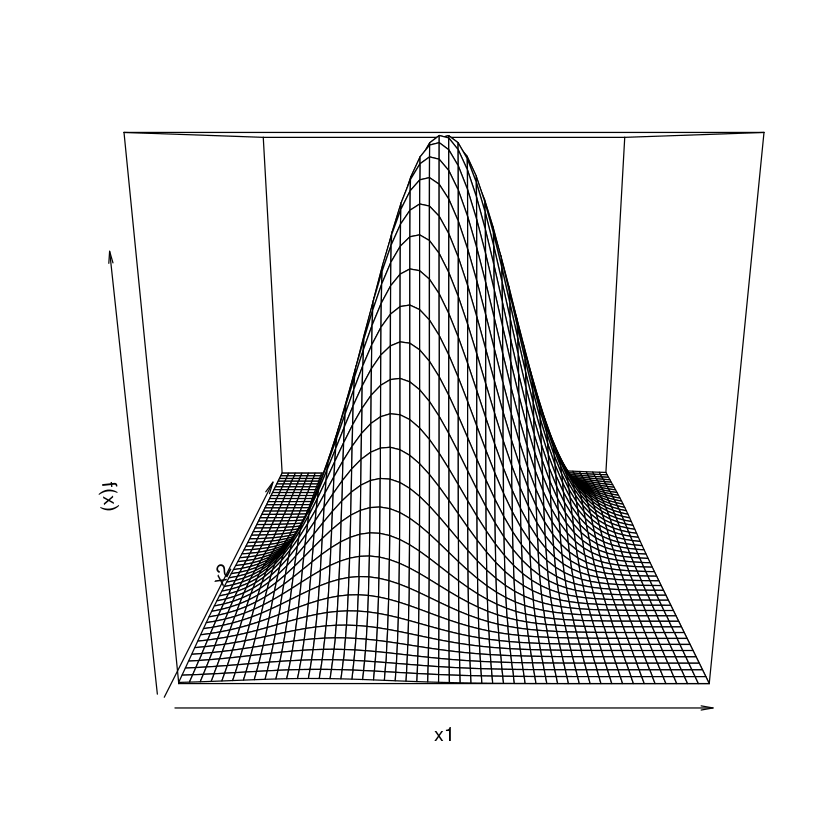

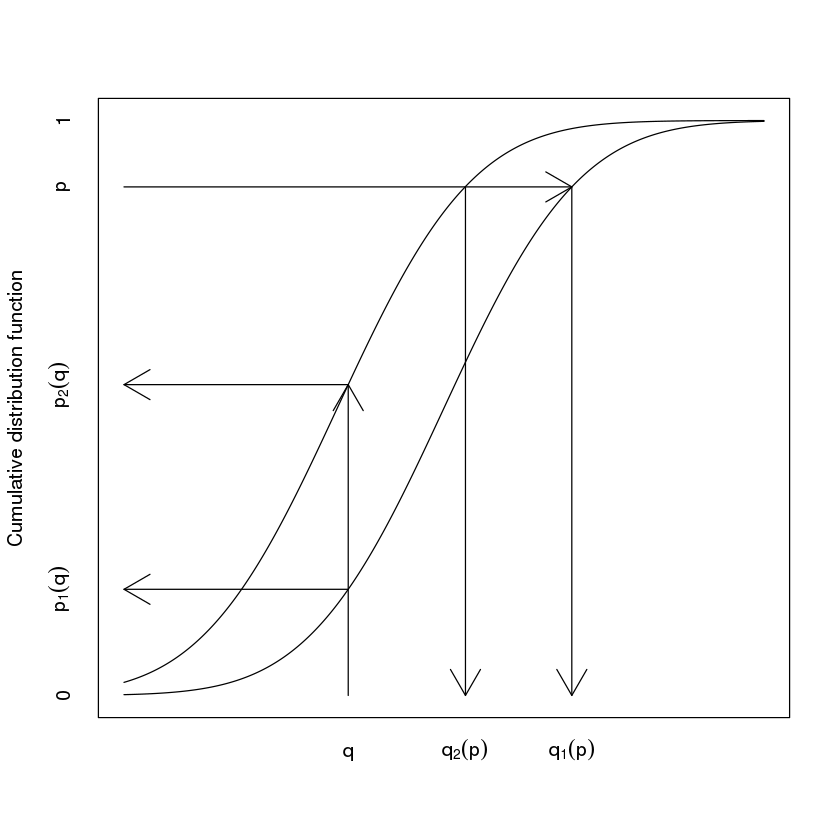

In [73]:
# draws the plot
persp(x = x, y = y, z = d, 
      xlab = "x1", 
      ylab = "x2",
      zlab = "f(x)")

# For many multivariate methods, the 
# assumption of multivariate normality is not 
# critical to the results of the analysis, but
# may need to test for multivariate normality 
# sometimes.

# Can start by assessing each variable separately 
# for univariate normality using a probability plot.
# Such plots are commonly applied in univariate
# analysis and involve ordering the observations 
# and then plotting them against the appropriate
# values of an assumed cumulative distribution
# function.

# There are two basic types of plots for comparing 
# two probability distributions, the probability-
# probability plot and the quantile-quantile plot.

# This code draws cumulative distribution 
# functions and quantiles
x <- seq(from = -3, to = 3, length = 1000)
Fx <- pnorm(x)
Fy <- pnorm(x, mean = -1)
plot(x, Fx, type = "l", axes = FALSE, xlab = "",
     ylab = "Cumulative distribution function") 
lines(x, Fy, type = "l")
x0 <- which.min((x - 1.2)^2)
x05 <- which.min((x + 0.5)^2)
x08 <- which.min((x + 0.9)^2)
xx <- which.min(abs(Fy - Fx[x0]))
arrows(x0 = c(min(x), x[x0], x[xx], 
              x[x08], x[x08], x[x08]),
       y0 = c(Fx[x0], Fx[x0], Fy[xx], 
              0, Fx[x08], Fy[x08]), 
       x1 = c(x[x0], x[x0], x[xx], x[x08], 
              -3, -3), 
       y1 = c(Fx[x0], 0, 0, Fy[x08], 
              Fx[x08], Fy[x08]))
mtext(at = c(x[x08], x[xx], x[x0]), 
      side = 1, line = 1, text =
      c(expression(q), expression(q[2](p)), 
        expression(q[1](p))))
mtext(at = c(0, Fx[x08], Fy[x08], Fx[x0], 1), 
      line = 1, side = 2, text =
      c(0, expression(p[1](q)), 
        expression(p[2](q)), 
        expression(p), 1)) 
box()

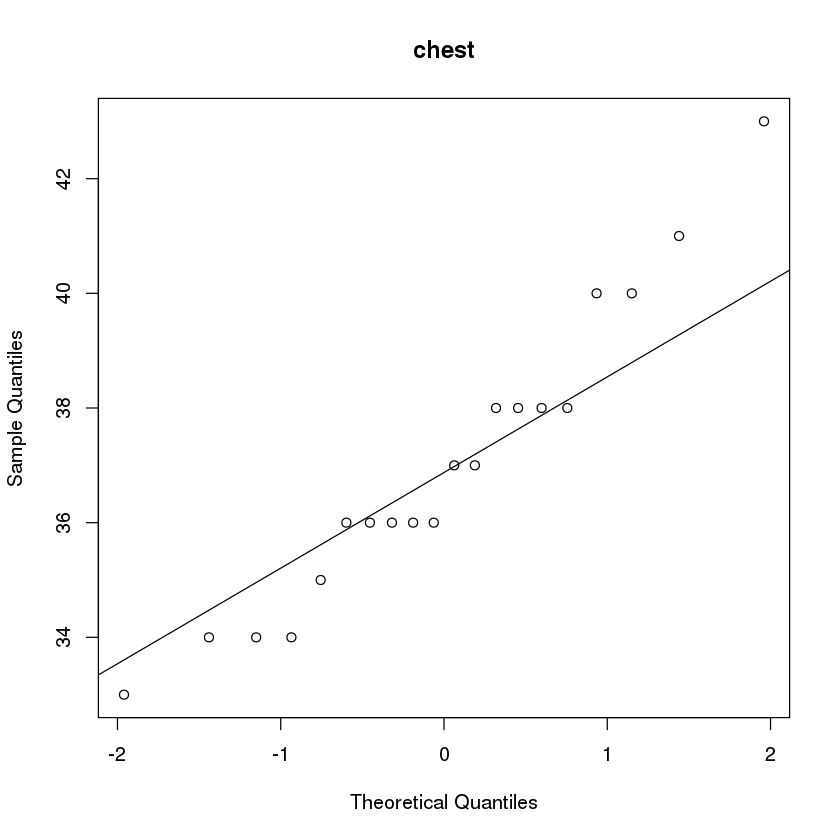

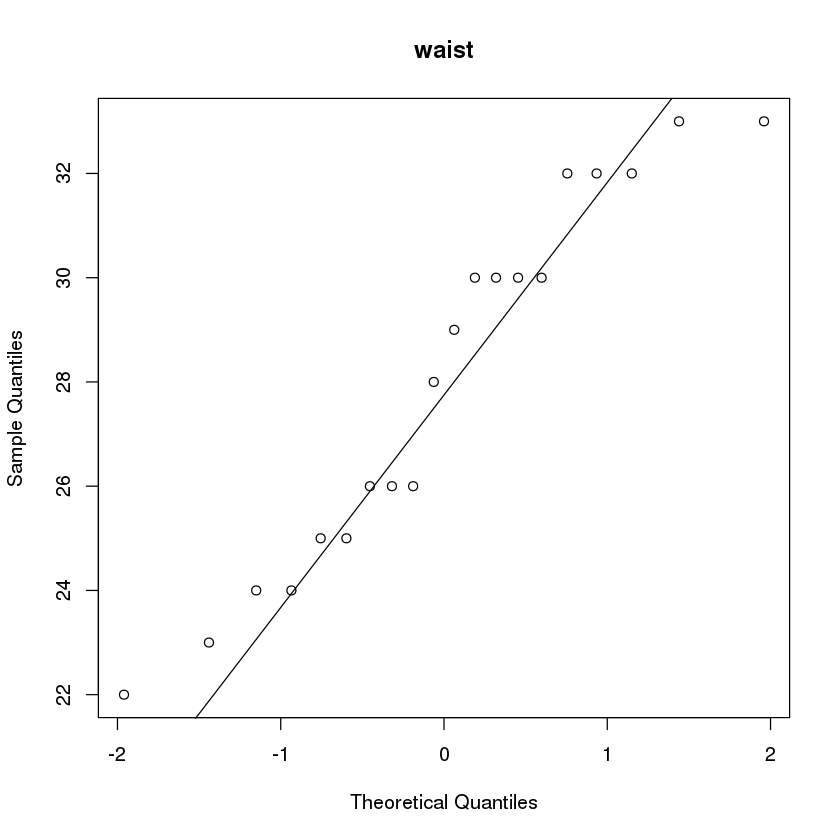

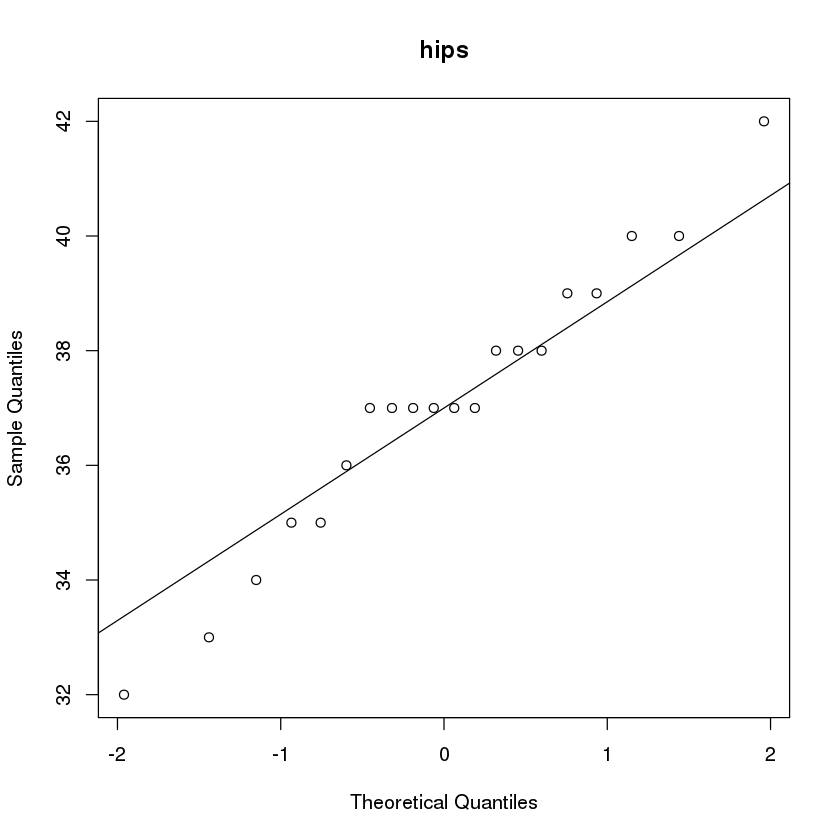

$SO2
NULL

$temp
NULL

$manu
NULL

$popul
NULL

$wind
NULL

$precip
NULL

$predays
NULL


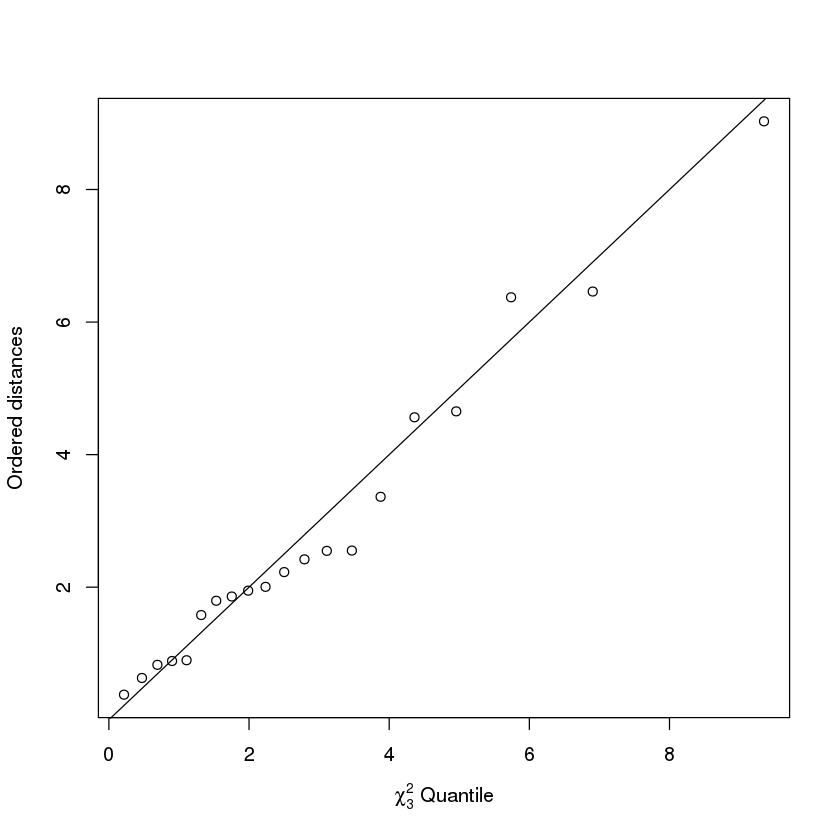

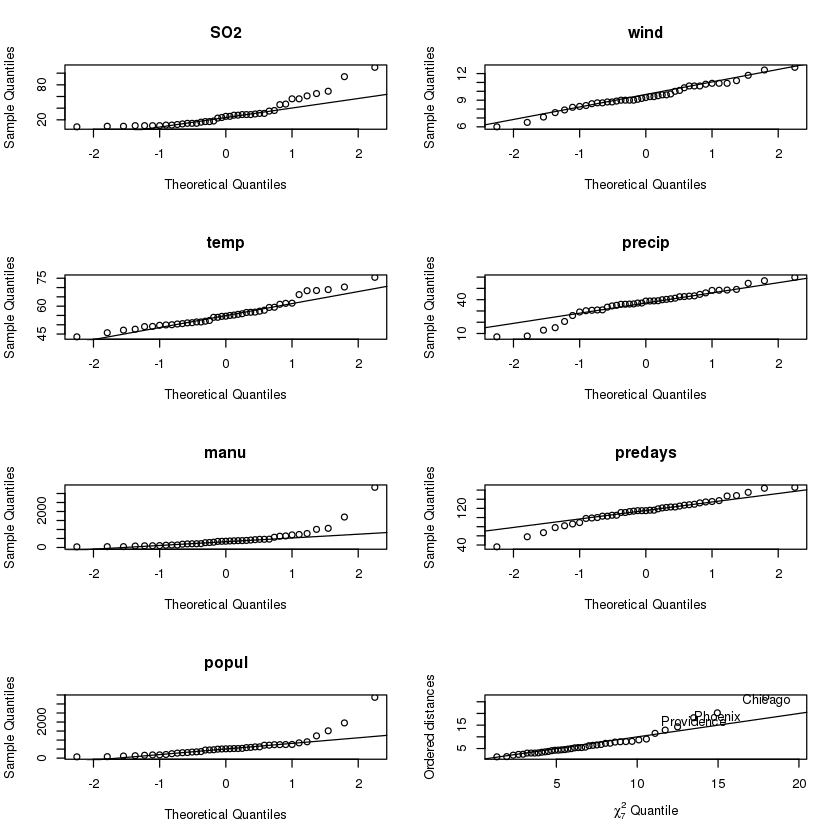

In [75]:
# Want to assess body measurement data for
# normality
x <- measure[, c("chest", "waist", "hips")]

# Estimate the means of all three variables
cm <- colMeans(x)
# and the covariance matrix
S <- cov(x)

# Compute differences di for all units in our
# data, so we iterate over rows using apply()
d <- apply(x, MARGIN = 1, function(x) 
           t(x - cm) %*% solve(S) %*% (x - cm))

# Normal probability plots of chest,
# waist, and hip measurements separately:
qqnorm(measure[,"chest"], main = "chest")
qqline(measure[,"chest"])
qqnorm(measure[,"waist"], main = "waist") 
qqline(measure[,"waist"])
qqnorm(measure[,"hips"], main = "hips") 
qqline(measure[,"hips"])

# Sorted distances can now be plotted against
# appropriate quantiles of chi-squared dist.

# Plotting the ordered distances against the
# corresponding quantiles of appropriate chi-sq
# distribution should lead through straight
# line through the origin.
plot(qchisq((1:nrow(x) - 1/2) / nrow(x), df = 3), sort(d),
     xlab = expression(paste(chi[3]^2, " Quantile")), 
     ylab = "Ordered distances")
abline(a = 0, b = 1)

# Do seem to deviate from normality a bit but
# we have so few observations it is hard to tell.

# Use chi-square plot on air pollution data

# Probability plots for each separate variable
layout(matrix(1:8, nc = 2))
# Iterate over all variables with sapply() that
# loops over variable names
sapply(colnames(USairpollution), function(x) {
    qqnorm(USairpollution[[x]], main = x)
    qqline(USairpollution[[x]])
})

# The plots for SO2 concentration and precipitation
# both deviate considerably from linearity, and 
# the plots for manufacturing and population show
# evidence of a number of outliers. But of more 
# importance is the chi-square plot for the data.

# R script is identical to the code used to 
# produce the chi-square plot for the body
# measurement data. 

# The two most extreme points in the plot have
# been labelled with the city names to which 
# they correspond using text().
x <- USairpollution
cm <- colMeans(x)
S <- cov(x)
d <- apply(x, 1, function(x) t(x - cm) %*% solve(S) %*% (x - cm))
plot(qc <- qchisq((1:nrow(x) - 1/2) / nrow(x), df = 7), 
     sd <- sort(d),
     xlab = expression(paste(chi[7]^2, 
                             " Quantile")), 
     ylab = "Ordered distances", 
     xlim = range(qc) * c(1, 1.1))
oups <- which(rank(abs(qc - sd), 
                   ties = "random") > nrow(x) - 3)
text(qc[oups], 
     sd[oups] - 1.5, 
     names(oups))
abline(a = 0, b = 1)